<a href="https://colab.research.google.com/github/Hemant2073/Hemant2073/blob/main/mini_project_zip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extraction folder already exists. Skipping extraction.
Digit folders found directly in: extracted_data/Train
Loaded 16994 images from extracted_data/Train.


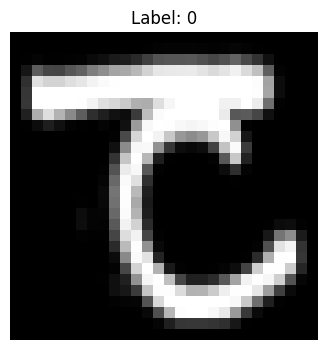

In [90]:

import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Extract the Zip File
# -------------------------------
zip_file_path = "Train_1.zip"          # Path to your zip file
extract_folder = "extracted_data"     # Folder where data will be extracted

if not os.path.exists(extract_folder):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print("Zip file extracted to:", extract_folder)
else:
    print("Extraction folder already exists. Skipping extraction.")

# -------------------------------
# Step 2: Locate the Folder Containing Digit Folders
# -------------------------------
# Assume the extracted zip structure is:
# extracted_data/Train/0, extracted_data/Train/1, ..., extracted_data/Train/9
# If not, we look for subfolders within extracted_data/Train that contain digit folders.

outer_folder = os.path.join(extract_folder, "Train")
if not os.path.isdir(outer_folder):
    raise ValueError(f"Expected folder 'Train' not found in {extract_folder}")

# Check if outer_folder directly contains folders that are digits
digit_folders = [d for d in os.listdir(outer_folder) if os.path.isdir(os.path.join(outer_folder, d)) and d.isdigit()]

if digit_folders:
    inner_folder = outer_folder
    print("Digit folders found directly in:", inner_folder)
else:
    # Otherwise, assume there's an extra layer. Use the first folder in outer_folder.
    inner_candidates = [d for d in os.listdir(outer_folder) if os.path.isdir(os.path.join(outer_folder, d))]
    if not inner_candidates:
        raise ValueError("No subfolders found in the Train folder.")
    inner_folder = os.path.join(outer_folder, inner_candidates[0])
    print("Using inner folder:", inner_folder)

# -------------------------------
# Step 3: Load and Preprocess Images
# -------------------------------
data = []
labels = []

# Loop through subfolders "0" to "9" inside inner_folder
for label in range(10):
    folder_path = os.path.join(inner_folder, str(label))
    if not os.path.isdir(folder_path):
        print(f"Folder {folder_path} not found. Skipping label {label}.")
        continue

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        # Load the image in grayscale
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: Could not load image {file_path}. Skipping.")
            continue
        # Resize the image to 28x28 pixels (adjust if needed)
        img = cv2.resize(img, (28, 28))
        # Normalize pixel values to [0,1]
        img = img.astype('float32') / 255.0
        data.append(img)
        labels.append(label)

# Convert lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Add a channel dimension for grayscale images
data = data.reshape(-1, 28, 28, 1)

print(f"Loaded {data.shape[0]} images from {inner_folder}.")


# -------------------------------
# Step 3: Split Data into Training and Test Sets
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)
plt.figure(figsize=(4,4))
# Remove the channel dimension for displaying purposes (28,28,1) -> (28,28)
plt.imshow(data[14050].reshape(28, 28), cmap='gray')
plt.title(f"Label: {labels[8]}")
plt.axis("off")
plt.show()

In [67]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# -------------------------------
# Step 6: Save the Trained Model
# -------------------------------
model.save("hindi_digit_model.h5")
print("Training complete and model saved as hindi_digit_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7199 - loss: 0.8405 - val_accuracy: 0.9800 - val_loss: 0.0735
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9596 - loss: 0.1290 - val_accuracy: 0.9841 - val_loss: 0.0482
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9724 - loss: 0.0845 - val_accuracy: 0.9897 - val_loss: 0.0376
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9834 - loss: 0.0544 - val_accuracy: 0.9865 - val_loss: 0.0403
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9829 - loss: 0.0529 - val_accuracy: 0.9929 - val_loss: 0.0291
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9888 - loss: 0.0358 - val_accuracy: 0.9950 - val_loss: 0.0237
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9915 - loss: 0.0275 - val_accuracy: 0.9947 - val_loss: 0.0241
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9929 - loss: 0.0256 - 

Test accuracy: 0.99
Training complete and model saved as hindi_digit_model.h5


In [116]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model("hindi_digit_model.h5")

def preprocess_image(image_path):
    """
    Load and preprocess the image:
    - Load in grayscale.
    - Resize to 28x28.
    - Normalize pixel values to [0, 1].
    - Add channel and batch dimensions.
    """
    # Load the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path {image_path} cannot be loaded.")

    # Resize image to 28x28 pixels
    image = cv2.resize(image, (28, 28))

    # Normalize pixel values to [0,1]
    image = image.astype('float32') / 255.0

    # Add channel dimension (to convert shape from (28,28) to (28,28,1))
    image = np.expand_dims(image, axis=-1)

    # Add batch dimension (model expects shape (batch_size, height, width, channels))
    image = np.expand_dims(image, axis=0)

    return image

def predict_digit(image_path):
    """
    Predict the digit from the given image.
    Prints the predicted digit along with the model's confidence.
    """
    image = preprocess_image(image_path)
    prediction = model.predict(image)

    # Get the predicted digit and confidence score
    digit = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted Digit: {digit} with confidence: {confidence:.2f}")
    return digit

# Test the model with a sample image (update the path as needed)
if __name__ == "__main__":
    test_image_path = "test_image7.png"  # Replace with your grayscale image path
    predict_digit(test_image_path)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Digit: 7 with confidence: 1.00


with grayscaling

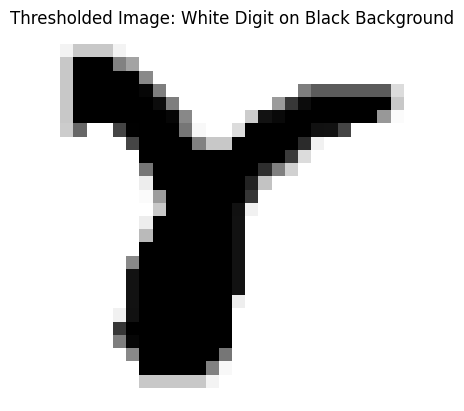

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted Digit: 1 with confidence: 0.52


np.int64(1)

In [111]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained CNN model
model = load_model("hindi_digit_model.h5")

def preprocess_and_threshold(image_path):
    """
    Load an image from image_path, convert it to grayscale,
    apply thresholding with inversion to get a white digit on a black background,
    resize to 28x28, normalize pixel values, and add channel and batch dimensions.

    Returns:
        processed: The preprocessed image ready for model input (shape: (1, 28, 28, 1))
        thresh_image: The thresholded 28x28 image (for display purposes)
    """
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image from path: {image_path}")

    # Apply thresholding with inversion so that the digit becomes white and background black
    threshold_value = 127  # You may adjust this value as needed
    max_value = 255
    _, thresh_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY_INV)

    # Resize the image to 28x28 pixels
    thresh_image = cv2.resize(thresh_image, (28, 28))

    # Normalize pixel values to [0, 1]
    normalized = thresh_image.astype('float32') / 255.0

    # Expand dimensions to add channel dimension (to get shape: (28, 28, 1))
    processed = np.expand_dims(normalized, axis=-1)

    # Expand dimensions to add batch dimension (final shape: (1, 28, 28, 1))
    processed = np.expand_dims(processed, axis=0)

    return processed, thresh_image

def predict_digit(image_path):
    """
    Preprocess the image from image_path and use the trained model to predict the digit.
    Displays the thresholded image and prints the predicted digit along with the confidence.
    """
    processed_image, thresh_image = preprocess_and_threshold(image_path)

    # Display the processed thresholded image
    plt.imshow(thresh_image, cmap='gray')
    plt.title("Thresholded Image: White Digit on Black Background")
    plt.axis("off")
    plt.show()

    # Predict using the model
    prediction = model.predict(processed_image)
    digit = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted Digit: {digit} with confidence: {confidence:.2f}")
    return digit

# Provide the path to your test image
test_image_path = "test_1_1.png"  # Update with the actual path to your test image

# Run the prediction function
predict_digit(test_image_path)


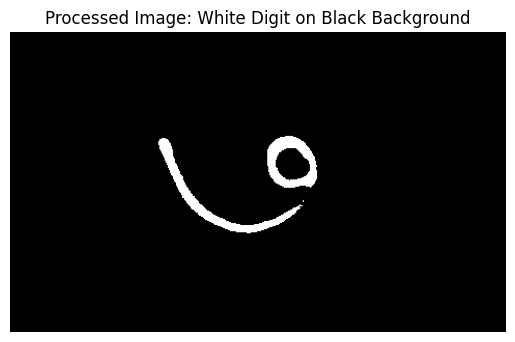

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path to your test image
test_image_path = "test_7.png"  # Update with your test image path

# Load the image in grayscale
image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError(f"Image at {test_image_path} could not be loaded.")

# Apply thresholding with inversion:
# THRESH_BINARY_INV makes pixels below the threshold white and above the threshold black.
# You might need to adjust the threshold value (e.g., 127) depending on your image.
threshold_value = 127
max_value = 255
_, processed_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY_INV)

# Display the processed image (white digit on black background)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image: White Digit on Black Background")
plt.axis("off")
plt.show()


In [65]:
import os
import shutil

# Specify the folder you want to remove
folder_path = '/content/extracted_data'  # Update with the correct folder path

# Check if the folder exists and then remove it
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' has been removed.")
else:
    print(f"Folder '{folder_path}' does not exist.")


Folder '/content/extracted_data' has been removed.
